In [1]:
import mlflow
import matplotlib.pyplot as plt
mlflow.tracking.set_tracking_uri("http://127.0.0.1:5000") # Just in case you didn't set MLFLOW_TRACKING_URI
mlflow.set_experiment("predicting_wind_solar")

You can access the mlflow data using the high level API like so:

In [2]:
runs = mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mae,metrics.val_mae,metrics.rmse,metrics.loss,...,params.opt_name,params.opt_decay,params.validation_split,params.opt_beta_1,params.batch_size,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.runName
0,33ecd53456e848b29d1eacb89e0f7919,2,FINISHED,./mlruns/2/33ecd53456e848b29d1eacb89e0f7919/ar...,2020-06-15 04:54:16.730000+00:00,2020-06-15 04:54:26.484000+00:00,1.602535,1.670733,2.417703,5.845290,...,Adam,0.0,0.2,0.9,256,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""33ecd53456e848b29d1eacb89e0f7919""...",keras
1,67f422fe794b4836968a01b41ba6b61a,2,FINISHED,./mlruns/2/67f422fe794b4836968a01b41ba6b61a/ar...,2020-06-15 04:53:11.023000+00:00,2020-06-15 04:53:30.594000+00:00,1.564935,1.580301,2.373009,5.631173,...,Adam,0.0,0.2,0.9,256,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""67f422fe794b4836968a01b41ba6b61a""...",keras
2,4e48438bfdee419d9572b93dbc899071,2,RUNNING,./mlruns/2/4e48438bfdee419d9572b93dbc899071/ar...,2020-06-15 04:52:33.528000+00:00,NaT,1.543212,1.580143,2.350006,5.522530,...,Adam,0.0,0.2,0.9,256,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,None,keras
3,510dcbe837914a0c82ba977561c27952,2,FINISHED,./mlruns/2/510dcbe837914a0c82ba977561c27952/ar...,2020-06-15 04:51:58.237000+00:00,2020-06-15 04:51:58.559000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""510dcbe837914a0c82ba977561c27952""...",lr
4,94b64db53c594ffb9397c9520aa6b037,2,FINISHED,./mlruns/2/94b64db53c594ffb9397c9520aa6b037/ar...,2020-06-15 04:51:41.499000+00:00,2020-06-15 04:51:41.799000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""94b64db53c594ffb9397c9520aa6b037""...",lr
5,be14ac2180004a3b839886a51daa2936,2,FAILED,./mlruns/2/be14ac2180004a3b839886a51daa2936/ar...,2020-06-15 04:51:38.457000+00:00,2020-06-15 04:51:38.611000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""be14ac2180004a3b839886a51daa2936""...",lr
6,37521ddb1e194c1283798f811490a466,2,FAILED,./mlruns/2/37521ddb1e194c1283798f811490a466/ar...,2020-06-15 04:51:24.690000+00:00,2020-06-15 04:51:24.841000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""37521ddb1e194c1283798f811490a466""...",lr
7,a33620837eb94c53b35e5c362f2d14cc,2,FAILED,./mlruns/2/a33620837eb94c53b35e5c362f2d14cc/ar...,2020-06-15 04:51:11.470000+00:00,2020-06-15 04:51:11.615000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""a33620837eb94c53b35e5c362f2d14cc""...",lr
8,cc77ab8d5d2d4408a83de491deb02492,2,FAILED,./mlruns/2/cc77ab8d5d2d4408a83de491deb02492/ar...,2020-06-15 04:51:02.673000+00:00,2020-06-15 04:51:02.816000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""cc77ab8d5d2d4408a83de491deb02492""...",lr
9,4c513893ce754eb091e3a89e6928b22d,2,FAILED,./mlruns/2/4c513893ce754eb091e3a89e6928b22d/ar...,2020-06-15 04:50:59.671000+00:00,2020-06-15 04:50:59.820000+00:00,1.703400,NaN,2.490909,NaN,...,None,None,None,None,None,samreay,LOCAL,/home/samreay/miniconda3/lib/python3.6/site-pa...,"[{""run_id"": ""4c513893ce754eb091e3a89e6928b22d""...",lr


In [3]:
mask = (runs["tags.mlflow.runName"] == "keras") & (runs["status"] == "FINISHED")
keras_ids = runs.loc[mask, "run_id"]
keras_ids

0    33ecd53456e848b29d1eacb89e0f7919
1    67f422fe794b4836968a01b41ba6b61a
Name: run_id, dtype: object

In [4]:
for run_id in keras_ids:
    run = mlflow.get_run(run_id).data.to_dictionary()
    print(run_id)
    print(run["metrics"])
    print(run["params"])

33ecd53456e848b29d1eacb89e0f7919
{'loss': 5.845290184020996, 'mae': 1.6025350093841553, 'rmse': 2.41770339012146, 'val_loss': 6.224023342132568, 'val_mae': 1.6707332134246826, 'val_rmse': 2.4947991371154785}
{'batch_size': '256', 'epochs': '50', 'opt_amsgrad': 'False', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_decay': '0.0', 'opt_epsilon': '1e-07', 'opt_learning_rate': '0.001', 'opt_name': 'Adam', 'validation_split': '0.2'}
67f422fe794b4836968a01b41ba6b61a
{'loss': 5.6311726570129395, 'mae': 1.5649348497390747, 'rmse': 2.373009204864502, 'val_loss': 5.818021774291992, 'val_mae': 1.5803011655807495, 'val_rmse': 2.412057638168335}
{'batch_size': '256', 'epochs': '100', 'opt_amsgrad': 'False', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_decay': '0.0', 'opt_epsilon': '1e-07', 'opt_learning_rate': '0.001', 'opt_name': 'Adam', 'validation_split': '0.2'}


Or you can go one layer down

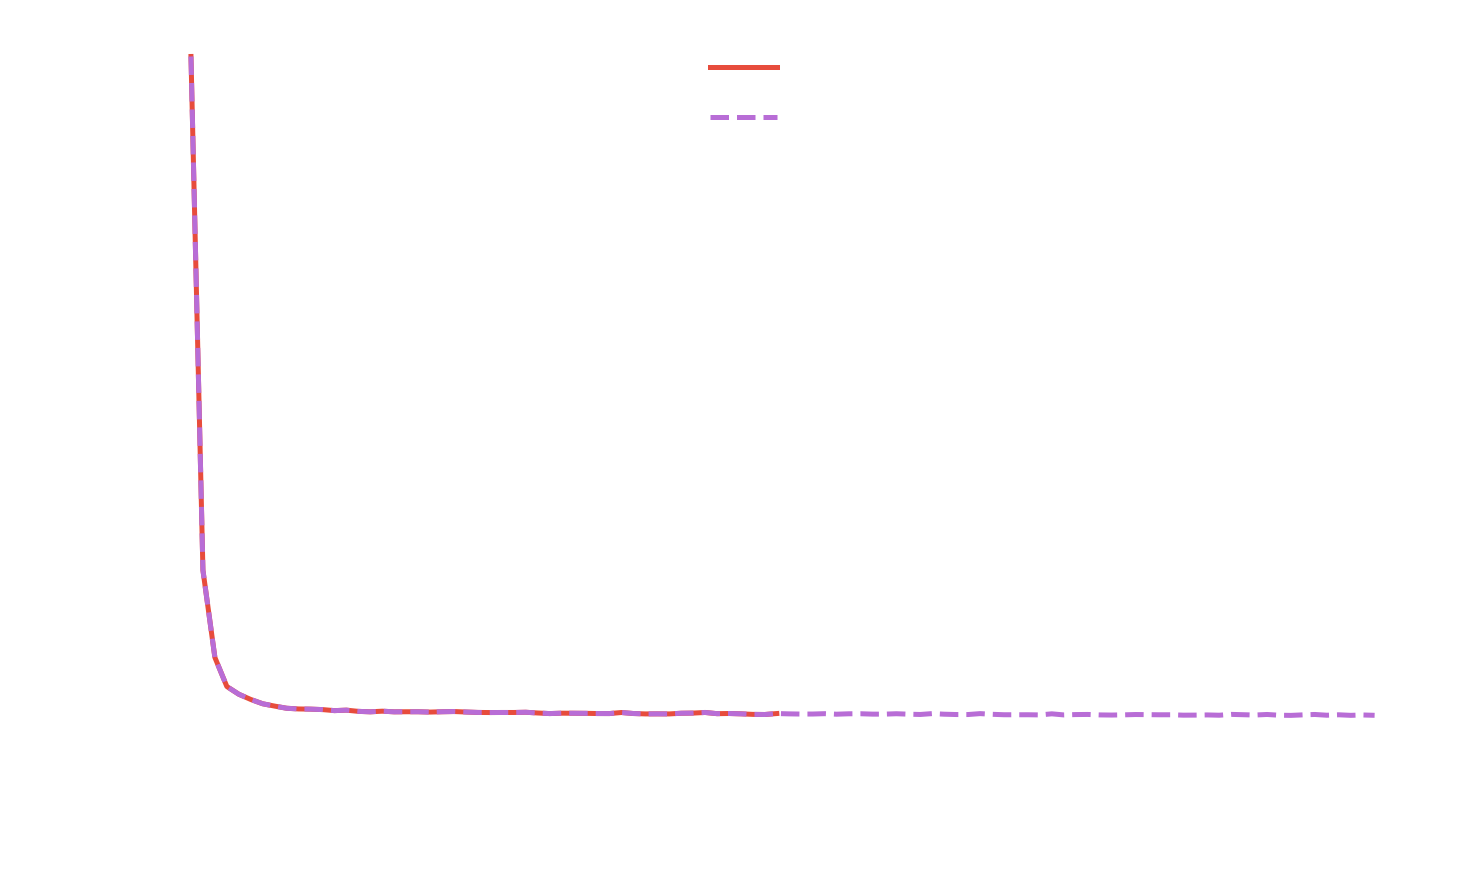

In [5]:
client = mlflow.tracking.MlflowClient()
for run_id in keras_ids:
    history = client.get_metric_history(run_id, "loss")
    epochs = [h.step for h in history]
    loss = [h.value for h in history]
    plt.plot(epochs, loss, label=run_id)
plt.legend(), plt.xlabel("epoch"), plt.ylabel("loss");